Using getNetCDFData.py
====================
This program is used for extracting data vectors from a NetCDF file, and optionally graphing them. Typically this program is used in the command-line. In the following notebook cells, sys.argv represents all arguments passed to getNetCDFData.py, which is then ran with getNetCDFData.main(). Equivalent command-line arguments are found in the section headers.


In [1]:
## Import for widgets
import ipywidgets as widgets

## Import for using getNetCDFData.py
import getNetCDFData

## Import for using sys.argv (enables command-line arguments)
import sys

## Idk if this works yet
from IPython.display import display

### Running with no arguments
------------------------------------
**Command-line:**
        
        python getNetCDFData.py
**Expected behavior:**
        
        prints the usage message

In [2]:
## argv is the array of arguments in python. getNetCDFData.py is always the 0th argument

sys.argv = ["getNetCDFData.py"]
getNetCDFData.main()

-> Usage: python getNetCDFData.py [--help] <netCDF file> <variable> <flags...>
-> Run "python getNetCDFData.py <netCDF file>" to see corresponding variables and their details.
       Optional flags:
         --help (prints useful information about getNetCDFData.py)
         --mode <vector or graph>
         --position <latitude_1> <longitude_1> <latitude_2> <longitude_2>... <latitude_n> <longitude_n>
         --altitude <altitude>
         --time <start> <end>


-1

### Running with --help flag
-------------------------------
**Command-line:**
        
        python getNetCDFData.py --help
**Expected behavior:**
        
        prints the help message, then the usage message

In [3]:
sys.argv = ["getNetCDFData.py", "--help"]
getNetCDFData.main()

-> Takes a netCDF file and a variable as an argument, and extracts a vector of data.
-> Optionally use graph mode to plot data vectors on a graph. This mode requires a variable that has Time as a dimension.
-> Use optional flags to set mode, as well as variable dimensions.
-> By default, mode=vector, latitude=0, longitude=0, altitude=0, time=1:2
-> Usage: python getNetCDFData.py [--help] <netCDF file> <variable> <flags...>
-> Run "python getNetCDFData.py <netCDF file>" to see corresponding variables and their details.
       Optional flags:
         --help (prints useful information about getNetCDFData.py)
         --mode <vector or graph>
         --position <latitude_1> <longitude_1> <latitude_2> <longitude_2>... <latitude_n> <longitude_n>
         --altitude <altitude>
         --time <start> <end>


-1

Vector Mode
====================
In vector mode, getNetCDFData returns a vector of data from the specified netCDF file.

* Using optional flags, you can also specify the values of different variables.


### Running with 1 argument: netCDF file
-----------------------------------------------
**Command-line:**
        
        python getNetCDFData.py <netCDF file>
        e.g. python getNetCDFData.py diagfi1_microts.nc
**Expected behavior:**
    
        prints information about all the variables in the given netCDF file

In [4]:
sys.argv = ["getNetCDFData.py", "diagfi1_microts.nc"]
getNetCDFData.main()

-> Time
	Attributes:	{'long_name': 'Time', 'units': 'days since 0000-00-0 00:00:00'}
	Dimensions:	('Time',)
-> controle
	Attributes:	{'title': 'Control parameters'}
	Dimensions:	('index',)
-> latitude
	Attributes:	{'units': 'degrees_north', 'long_name': 'North latitude'}
	Dimensions:	('latitude',)
-> longitude
	Attributes:	{'long_name': 'East longitude', 'units': 'degrees_east'}
	Dimensions:	('longitude',)
-> altitude
	Attributes:	{'long_name': 'pseudo-alt', 'units': 'km', 'positive': 'up'}
	Dimensions:	('altitude',)
-> aps
	Attributes:	{'title': 'hybrid pressure at midlayers', 'units': 'Pa'}
	Dimensions:	('altitude',)
-> bps
	Attributes:	{'title': 'hybrid sigma at midlayers', 'units': ''}
	Dimensions:	('altitude',)
-> ap
	Attributes:	{'title': 'hybrid pressure at interlayers', 'units': 'Pa'}
	Dimensions:	('interlayer',)
-> bp
	Attributes:	{'title': 'hybrid sigma at interlayers', 'units': ''}
	Dimensions:	('interlayer',)
-> soildepth
	Attributes:	{'long_name': 'Soil mid-layer depth', '

0

### Running with 2 arguments: netCDF file & variable
-----------------------------------------------
**Command-line:**
        
        python getNetCDFData.py <netCDF file> <variable>
        e.g. python getNetCDFData.py diagfi1_microts.nc tsurf
**Expected behavior:**
    
        Uses "vector mode" - prints a vector of data corresponding to this variable.
        default values are used for latitude(0), longitude(0), altitude(0), and time(1:2).

In [5]:
sys.argv = ["getNetCDFData.py", "diagfi1_microts.nc", "tsurf"]
getNetCDFData.main()

-----------Vector Mode-------------
Surface temperature (K):
    [196.9339  189.7807  218.76273 282.8176  261.94064 209.99358 197.11069]
Coordinates:
  * Time       (Time) float32 1.0 1.167 1.333 1.5 1.667 1.833 2.0
    latitude   float64 0.0
    longitude  float64 0.0


0

### Running with an optional flag
-----------------------------------------------
**Command-line:**
        
        python getNetCDFData.py <netCDF file> <variable> <flags...>
        e.g. python getNetCDFData.py diagfi1_microts.nc tsurf --position 20 0
**Expected behavior:**
    
        Gets arguments from optional flags and assigns them to mode, latitude, longitude, altitude, or time respectively.
        If the assignment does not exactly match any data point, it rounds to the nearest one (setting latitude to 20 actually results in latitude = 18.75).
        In this example, latitude = 20 and longitude = 0, and all other values are default.

In [6]:
## Use these sliders to adjust the latitude and longitude in the following example.
lax_slider = widgets.Layout(margin = '10px', width='33%')
lat = widgets.IntSlider(description = "N Latitude", min = -90, max = 90, layout = lax_slider)
long = widgets.IntSlider(description = "E Longitude", min = -180, max = 180, layout = lax_slider)

display(lat)
display(long)

IntSlider(value=0, description='N Latitude', layout=Layout(margin='10px', width='33%'), max=90, min=-90)

IntSlider(value=0, description='E Longitude', layout=Layout(margin='10px', width='33%'), max=180, min=-180)

In [7]:
sys.argv = ["getNetCDFData.py", "diagfi1_microts.nc", "tsurf", "--position", lat.value, long.value]
getNetCDFData.main()

-----------Vector Mode-------------
Surface temperature (K):
    [196.9339  189.7807  218.76273 282.8176  261.94064 209.99358 197.11069]
Coordinates:
  * Time       (Time) float32 1.0 1.167 1.333 1.5 1.667 1.833 2.0
    latitude   float64 0.0
    longitude  float64 0.0


0

### Multiple locations
-----------------------------------------------
**Command-line:**
        
        python getNetCDFData.py <netCDF file> <variable> --position <x> <y> <x> <x>
        e.g. python getNetCDFData.py diagfi1_microts.nc tsurf --position -20 0 20 0
**Expected behavior:**
    
        Multiple locations can be specified if more than one pair of coordinates is passed to the --position flag. Then multiple vectors will be selected.

In [8]:
## Use these sliders to adjust the latitude and longitude in the following example.
lat_1 = widgets.IntSlider(description = "N Lat. 1", min = -90, max = 90, layout = lax_slider)
long_1 = widgets.IntSlider(description = "E Long. 1", min = -180, max = 180, layout = lax_slider)
lat_2 = widgets.IntSlider(description = "N Lat. 2", min = -90, max = 90, layout = lax_slider)
long_2 = widgets.IntSlider(description = "E Long. 2", min = -180, max = 180, layout = lax_slider)

h_1 = widgets.HBox([lat_1, lat_2])
h_2 = widgets.HBox([long_1, long_2])
widgets.VBox([h_1, h_2])

In [9]:
sys.argv = ["getNetCDFData.py", "diagfi1_microts.nc", "tsurf", "--position", lat_1.value, long_1.value, lat_2.value, long_2.value]
getNetCDFData.main()

-----------Vector Mode-------------
-> Vector #0
Surface temperature (K):
    [196.9339  189.7807  218.76273 282.8176  261.94064 209.99358 197.11069]
Coordinates:
  * Time       (Time) float32 1.0 1.167 1.333 1.5 1.667 1.833 2.0
    latitude   float64 0.0
    longitude  float64 0.0

-> Vector #2
Surface temperature (K):
    [196.9339  189.7807  218.76273 282.8176  261.94064 209.99358 197.11069]
Coordinates:
  * Time       (Time) float32 1.0 1.167 1.333 1.5 1.667 1.833 2.0
    latitude   float64 0.0
    longitude  float64 0.0


0

### All the flags
-----------------------------------------------
**Command-line:**
        
        python getNetCDFData.py <netCDF file> <variable> --position <x> <y> --time <start> <end> --altitude <z>
        e.g. python getNetCDFData.py diagfi1_microts.nc h2o_ice --position 70 -120 --time 5 8 --altitude <10>
**Expected behavior:**
    
        Adjusting time can result in a much longer vector.

In [44]:
## Use these sliders to adjust the latitude and longitude in the following example.
lat = widgets.IntSlider(description = "N Latitude", min = -90, max = 90, layout = lax_slider)
long = widgets.IntSlider(description = "E Longitude", min = -180, max = 180, layout = lax_slider)
time = widgets.IntRangeSlider(description = "Time", min = 1, max = 10, layout = lax_slider)
alt = widgets.IntSlider(description = "Altitude (km)", min = 0, max = 100, layout = lax_slider)


widgets.VBox([lat, long, time, alt])

In [24]:
sys.argv = ["getNetCDFData.py", "diagfi1_microts.nc", "h2o_ice", "--position", lat.value, long.value, "--time", time.value[0], time.value[1], "--altitude", alt.value]
getNetCDFData.main()

-----------Vector Mode-------------
h2o_ice (kg/kg):
    [5.1327991e-12 4.8755275e-12 7.1842974e-12 ... 3.6792665e-12 3.3708026e-12
 4.7737270e-12]
Coordinates:
  * Time       (Time) float32 1.0 1.167 1.333 1.5 ... 668.5 668.7 668.8 669.0
    latitude   float64 0.0
    longitude  float64 0.0
    altitude   float64 0.004481


0

### Running in graph mode
-----------------------------------------------
**Command-line:**
        
        python getNetCDFData.py <netCDF file> <variable> --mode graph
        e.g. python getNetCDFData.py diagfi1_microts.nc tsurf --mode graph --position 0 0 40 0
**Expected behavior:**
    
        Uses "graph mode" - finds a vector of data corresponding to this variable and graphs it on a matplotlib plot.
        default values are used for altitude(0) and time(1:2).

In [41]:
## Use these sliders to adjust the latitude and longitude in the following example.
lat_1 = widgets.IntSlider(description = "N Lat. 1", min = -90, max = 90, layout = lax_slider)
long_1 = widgets.IntSlider(description = "E Long. 1", min = -180, max = 180, layout = lax_slider)
lat_2 = widgets.IntSlider(description = "N Lat. 2", min = -90, max = 90, layout = lax_slider)
long_2 = widgets.IntSlider(description = "E Long. 2", min = -180, max = 180, layout = lax_slider)

h_1 = widgets.HBox([lat_1, lat_2])
h_2 = widgets.HBox([long_1, long_2])
widgets.VBox([h_1, h_2])

-----------Graph Mode-------------


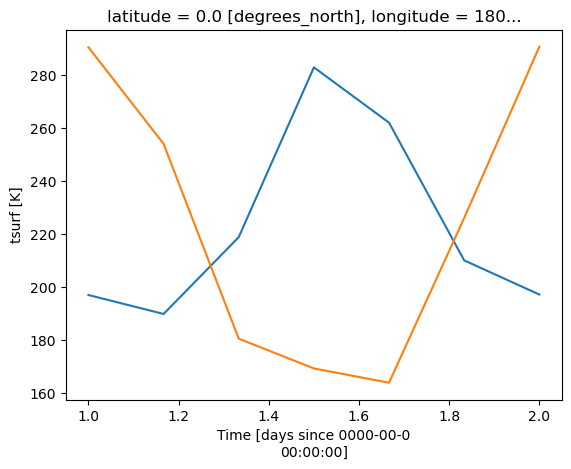

0

In [43]:
sys.argv = ["getNetCDFData.py", "diagfi1_microts.nc", "tsurf", "--mode", "graph", "--position", lat_1.value, long_1.value, lat_2.value, long_2.value]
getNetCDFData.main()